# Task 6.5 Unsupervised Machine Learning 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.


In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Create path
path = r'C:\Users\RebekkaBrandt\Documents\Immo Data Analysis'

# import file
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immo_data_avgfam.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,scoutId,State,Zipcode,City,totalRent,baseRent,serviceCharge,heatingCosts,...,lift,petsAllowed,garden,heatingType,picturecount,newlyConst,yearConstructed,lastRefurbish,date,rentpersqm
0,0,0,96107057,Nordrhein_Westfalen,44269,Schüren,840.0,595.0,245.00,NaN,...,False,NaN,True,central_heating,6,False,1965.0,NaN,May19,6.918605
1,2,2,113147523,Sachsen,1097,Äußere_Neustadt_Antonstadt,1300.0,965.0,255.00,NaN,...,True,NaN,False,floor_heating,8,True,2019.0,NaN,Oct19,11.515513
2,3,3,108890903,Sachsen,9599,Freiberg,NaN,343.0,58.15,87.23,...,False,NaN,False,district_heating,9,False,1964.0,NaN,May19,5.898538
3,4,4,114751222,Bremen,28213,Neu_Schwachhausen,903.0,765.0,138.00,NaN,...,False,NaN,False,self_contained_central_heating,19,False,1950.0,NaN,Feb20,9.003178
4,5,5,115531145,Schleswig_Holstein,24891,Struxdorf,NaN,315.2,142.00,NaN,...,False,no,False,gas_heating,5,False,1999.0,NaN,Feb20,5.899308


In [19]:
df.shape

(252576, 29)

In [11]:
# create subset with only numerical values 
sub = df[['Zipcode', 'baseRent', 'Sqm','noRooms', 'yearConstructed', 'rentpersqm']]

In [13]:
sub.head()

,Zipcode,baseRent,Sqm,noRooms,yearConstructed,rentpersqm
0,44269,595.0,86.00,4.0,1965.0,6.918605
1,1097,965.0,83.80,3.0,2019.0,11.515513
2,9599,343.0,58.15,3.0,1964.0,5.898538
3,28213,765.0,84.97,3.0,1950.0,9.003178
4,24891,315.2,53.43,2.0,1999.0,5.899308


In [26]:
# droping rows with NAN values
sub.dropna(inplace = True)



C:\Users\RebekkaBrandt\AppData\Local\Temp\ipykernel_3588\4059554937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.dropna(inplace = True)


In [30]:
sub.shape

(197927, 6)

### 2. The elbow technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [31]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

[-149529949406541.88,
 -42367828028903.57,
 -15087956304030.486,
 -8896804192371.963,
 -5011890303855.3125,
 -3850445164438.307,
 -3075345886153.229,
 -2253105809671.3804,
 -1770856475618.5994]

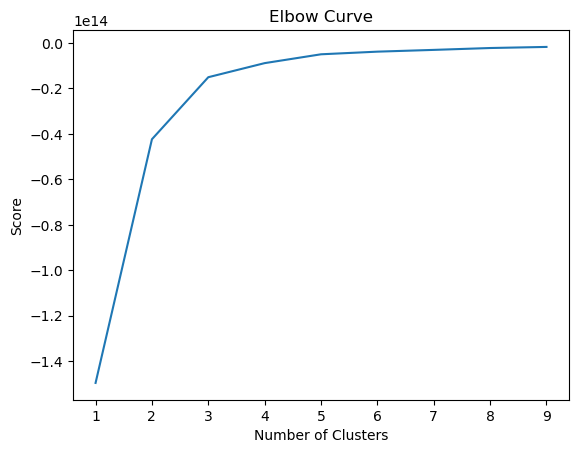

In [32]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [33]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [35]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [36]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RebekkaBrandt\AppData\Local\Temp\ipykernel_3588\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [37]:
sub.head()

,Zipcode,baseRent,Sqm,noRooms,yearConstructed,rentpersqm,clusters
0,44269,595.0,86.00,4.0,1965.0,6.918605,1
1,1097,965.0,83.80,3.0,2019.0,11.515513,0
2,9599,343.0,58.15,3.0,1964.0,5.898538,0
3,28213,765.0,84.97,3.0,1950.0,9.003178,1
4,24891,315.2,53.43,2.0,1999.0,5.899308,0


In [56]:
sub['clusters'].value_counts()

0    83193
1    75960
2    38774
Name: clusters, dtype: int64

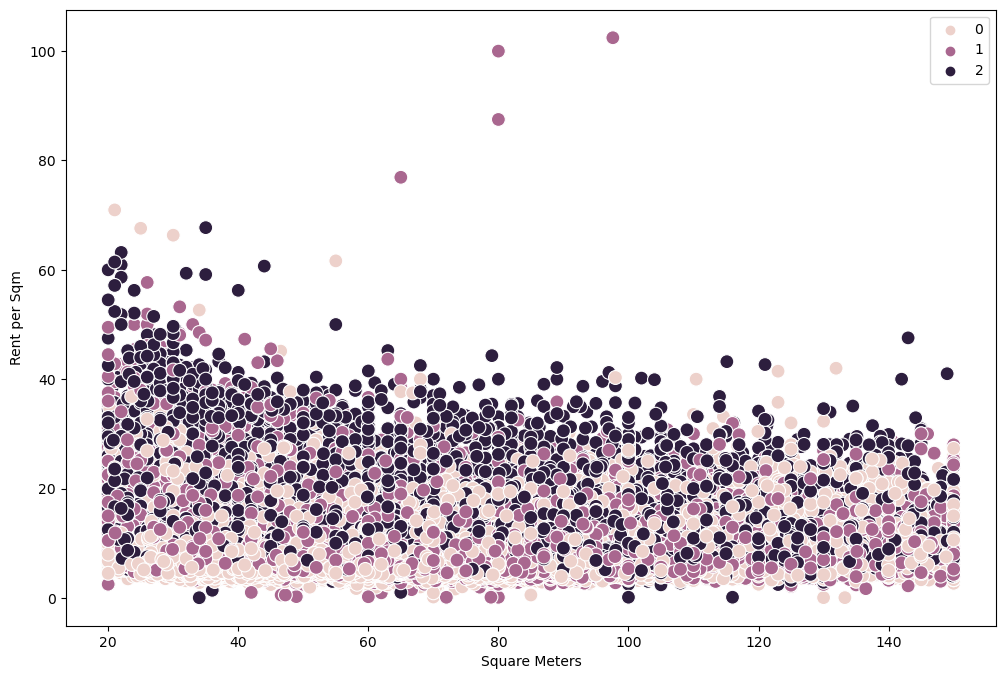

In [41]:
# Plot the clusters for the "Rent per Sqm" and "Sqm" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Sqm'], y=sub['rentpersqm'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Square Meters') # Label x-axis.
plt.ylabel('Rent per Sqm') # Label y-axis.
plt.show()

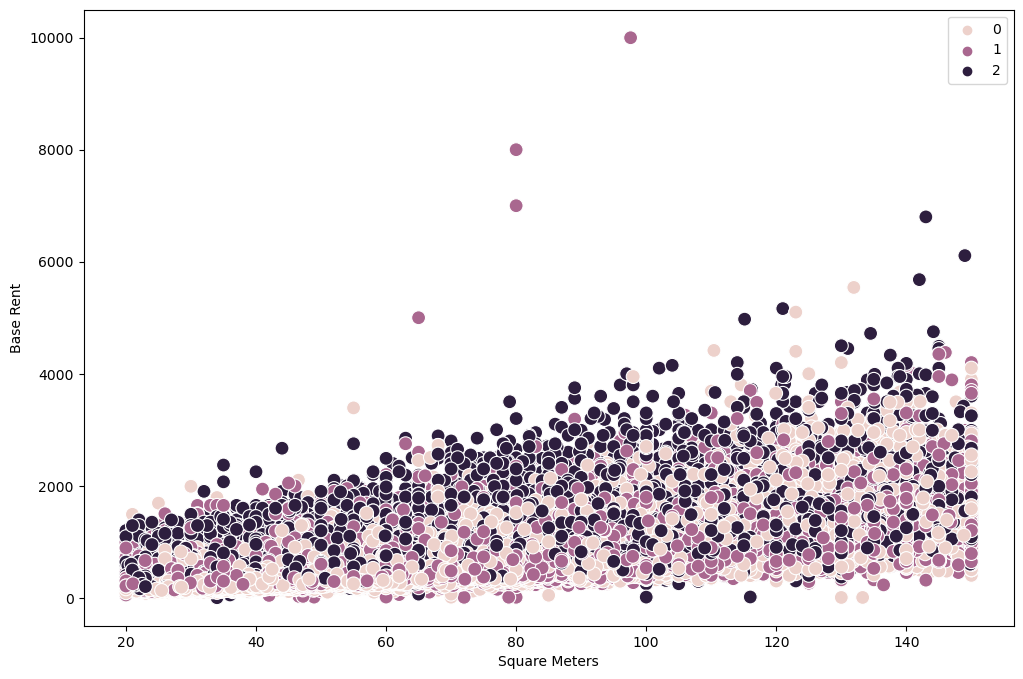

In [52]:
# Plot the clusters for the "Base Rent" and "Sqm" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Sqm'], y=sub['baseRent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Square Meters') # Label x-axis.
plt.ylabel('Base Rent') # Label y-axis.
plt.show()

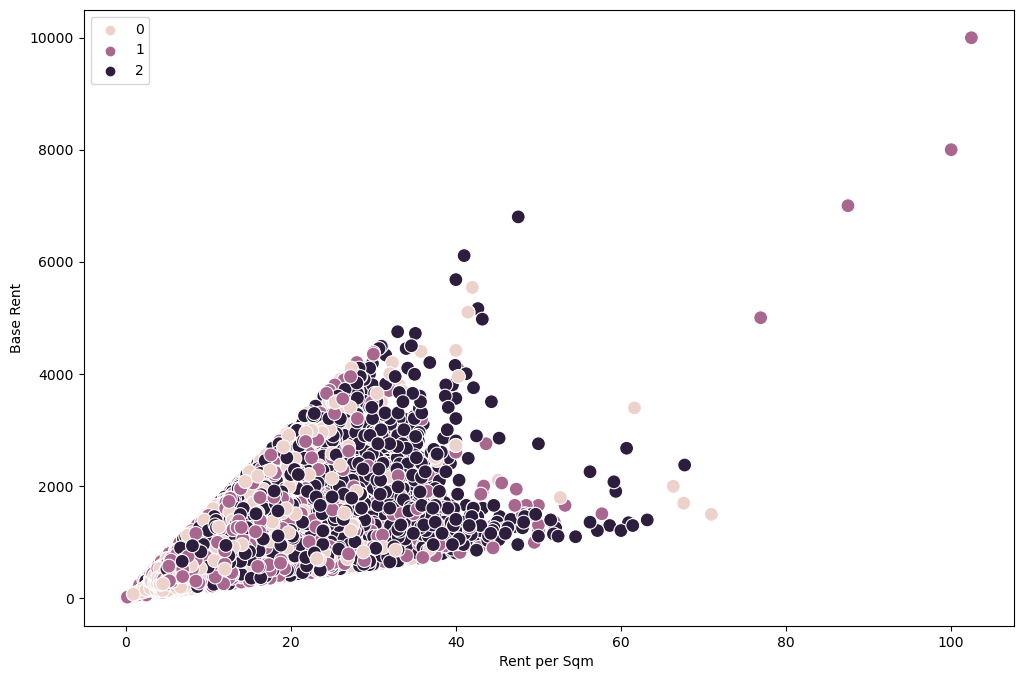

In [57]:
# Plot the clusters for the "Base Rent" and "Rent perSqm" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['rentpersqm'], y=sub['baseRent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rent per Sqm ') # Label x-axis.
plt.ylabel('Base Rent') # Label y-axis.
plt.show()

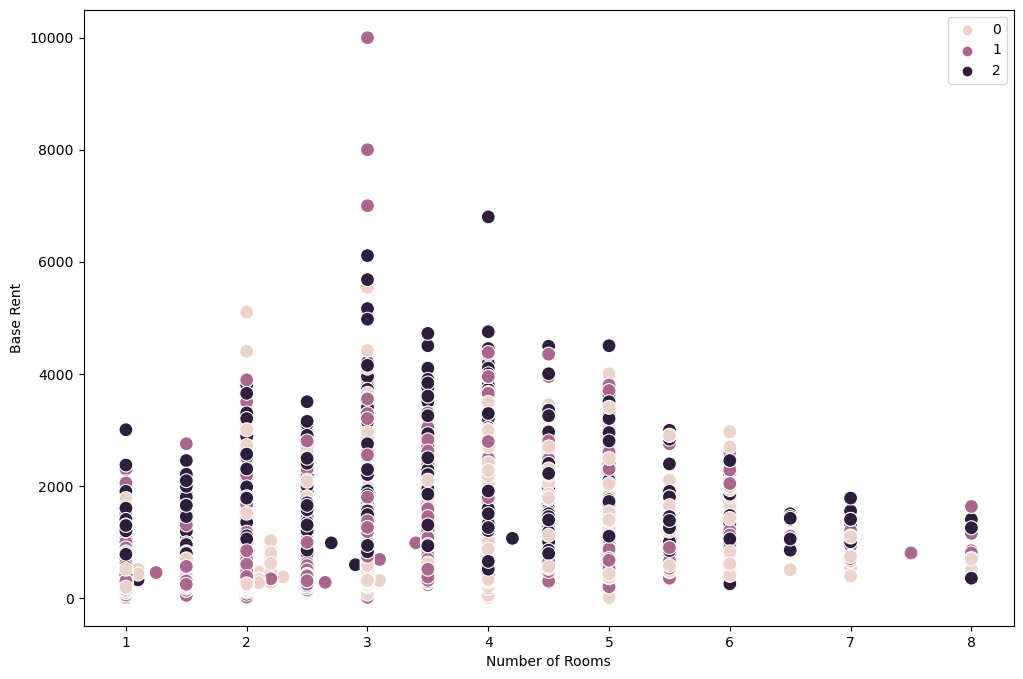

In [54]:
# Plot the clusters for the "Base Rent" and "Number of Rooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['noRooms'], y=sub['baseRent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Rooms') # Label x-axis.
plt.ylabel('Base Rent') # Label y-axis.
plt.show()

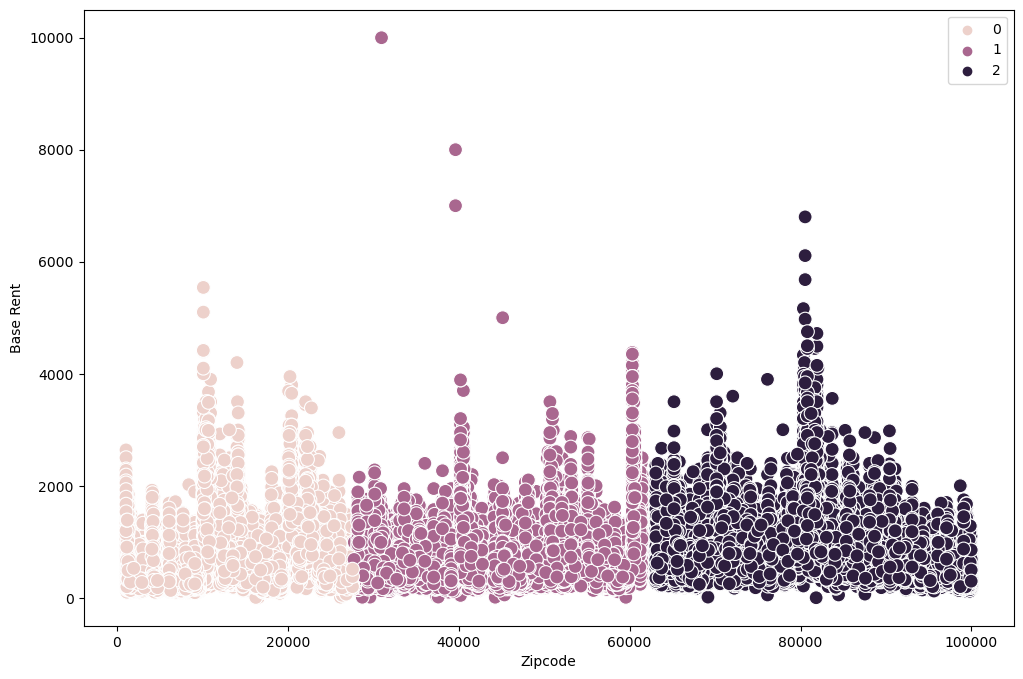

In [55]:
# Plot the clusters for the "Base Rent" and "Zipcode" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Zipcode'], y=sub['baseRent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Zipcode') # Label x-axis.
plt.ylabel('Base Rent') # Label y-axis.
plt.show()

### 4. Analysis

#
After looking at various different plots it seems the result is that k-mean algorithm might not be the best tool for analysing this dataset. 
The clusters are all very close togehter and get mixed up with each other. There does not seem to be a discernable patern that arises from this kind of analysis

In [48]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\RebekkaBrandt\AppData\Local\Temp\ipykernel_3588\749661046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [51]:
sub.groupby('cluster').agg({'Zipcode':['mean', 'median'], 
                         'baseRent':['mean', 'median'], 
                         'Sqm':['mean', 'median'],
                          'noRooms':['mean', 'median'],
                          'yearConstructed':['mean', 'median'],
                          'rentpersqm':['mean', 'median']})


Zipcode             baseRent               Sqm         \
                     mean   median        mean median       mean median   
cluster                                                                   
dark purple  79579.018079  80339.0  878.818247  790.0  78.185160  76.89   
pink         10308.978953   8529.0  511.807043  371.0  65.847034  61.62   
purple       45017.272354  45144.0  599.390195  490.0  72.658856  69.79   

              noRooms        yearConstructed         rentpersqm             
                 mean median            mean  median       mean     median  
cluster                                                                     
dark purple  2.694857    3.0     1984.516067  1990.0  11.628333  10.219780  
pink         2.502931    2.0     1963.159088  1972.0   7.512442   6.097561  
purple       2.647769    3.0     1971.922407  1971.0   8.231220   7.222222

#
The Grouping analysis show cluster "dark purple" to be the properties at the higher end of the price, for base rent and rent per square meter, but also bigger in size. "pink" seems to be the opposite, lower end of costwise, but also on the smaller end. Interessting is "purple" which is also quite low in cost, but in the medium range with size. 
Overall the numbers are however also very close to eachother , not providing a lot more usefull insights